# Diferentes tipo de "magics", contenedores, iteradores y generadores. 

## Modules "magic" se llaman **dunders** (double underscores)
Un ejemplo ```__add__()``` Veamos estos

In [1]:
a=5
b=4
# como se implementa a+b internamente. Como un overload
a.__add__(b)


9

In [2]:
a+b

9

In [3]:
# para ver la cantidad de "dunders" que tiene el sistema, solo veamos, por ejemplo, los "dunders" asociados 
# la clase int
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes

En esta clase solo veremos algunos "dunders" de la clase ```object```

In [4]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### Metodos especiales

* ```__str__()``` y ```__repr__()``` 
Manejan cadenas y son como una sobrecarga al print(). Veamos
ejemplos

In [5]:
from datetime import datetime
today  = datetime.now()

print(today)

2023-05-09 15:18:52.402410


In [6]:
print(str(today))

2023-05-09 15:18:52.402410


In [7]:
print(repr(today))

datetime.datetime(2023, 5, 9, 15, 18, 52, 402410)


In [8]:
today.__str__

<method-wrapper '__str__' of datetime.datetime object at 0x7fde1d333600>

In [9]:
today.__str__()

'2023-05-09 15:18:52.402410'

In [10]:
today.__repr__

<method-wrapper '__repr__' of datetime.datetime object at 0x7fde1d333600>

In [11]:
today.__

'datetime.datetime(2023, 5, 9, 15, 18, 52, 402410)'

### Quien tiene precedencia, el ```__str__()``` o ```__repr__```?
La respondemos con un ejemplo

In [13]:
class Car:
    
    def __init__(self, model, year):
        self.model = model
        self.year = year
        return

    
    def __repr__(sefl):
        return f'desde repr: My carro es un {self.model} del año {self.year}'

    def __str__(self):
        return f'desde str: My carro es un {self.model} del año {self.year}'


c = Car("Toyota", 2012)
print(c) 

desde str: My carro es un Toyota del año 2012


In [15]:
# verifiquemos que pasa si removemos el __str_

class Car:
    
    def __init__(self, model, year):
        self.model = model
        self.year = year
        return

    
    def __repr__(self):
        return f'desde repr: My carro es un {self.model} del año {self.year}'



c = Car("Toyota", 2012)
print(c) 

desde repr: My carro es un Toyota del año 2012


* ```__hash__()```. Hash crea una lista de "keys" (indices) que se pueden usar en un diccionario. De hecho todos los diccionarios son "has tables". Pero la funcion ```__hash__()```
crea claves secretas que se pueden usar en bases datos extensas para crear diccionarios de forma eficiente.

* ```__bool__```  : se usa para sobrecargar funciones logicas que solo retornan falso o verdadero.

* ```_del__()``` : opera como destructor. De este veremos un ejemplo.

#### Ejemplo del uso del destructor

In [16]:
class Exm:

    # initialize
    def __init__(self):
        print("ejemplo que muestra el uso de __del__")
        return

    # sobrecarga de borrar o destructor
    def __del__(self):
        print("el destructor del objeto se llamo")
        return

obj = Exm()


ejemplo que muestra el uso de __del__


In [17]:
del(obj)

el destructor del objeto se llamo


In [18]:
print(obj)

NameError: ignored

## Magic Commands:
Hay varios tipos
1. Line magics : solo una linea
2. cell magics : solo una celda, o varias lineas

**Ojo** : Estas cosas solo funcionan in iPython (es decir, Jupyter, Jupyter-lab, Google Colab, etc)

Un comando importante es **automagic** es un switch que
cambia a si, no con cada corrida. El objeto de este comando es evitar tener que poner los "%" en los comandos "magic"

In [22]:
automagic

NameError: ignored

In [21]:
automagic

NameError: ignored

In [24]:
%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [25]:
automagic


Automagic is OFF, % prefix IS needed for line magics.


In [26]:
%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


## Lista de los "magic commands"

In [27]:
lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [28]:
history

a=5
b=4
# como se implementa a+b internamente. Como un overload
a.__add__(b)
a+b
# para ver la cantidad de "dunders" que tiene el sistema, solo veamos, por ejemplo, los "dunders" asociados 
# la clase int
dir(int)
dir(object)
from datetime import datetime
today  = datetime.now()

print(today)
print(str(today))
print(repr(today))
today.__str__
today.__str__()
today.__repr__
today.__repr__()
class Car:
    
    def __init__(self, model, year):
        self.model = model
        self.year = year
        return

    def __str__(self):
        return f'desde str: My carro es un {self.model} del año {self.year}'

    def __repr__(sefl):
        return f'desde repr: My carro es un {self.model} del año {self.year}'

c = Car("Toyota", 2012)
print(c)
class Car:
    
    def __init__(self, model, year):
        self.model = model
        self.year = year
        return

    
    def __repr__(sefl):
        return f'desde repr: My carro es un {self.model} del año {self.year}'

    def __str__(self

In [29]:
ls


sample_data/


In [30]:
%%html
<svg xmlns="https://www.w3.org/2000/svg" viewBox="0 0 600 400" width="400"␣
,→height="400">
<rect x="10" y="00" width="1000" height="150" rx="0" style="fill:yellow;␣
,→stroke:black; fill-opacity:1.0" />
<rect x="10" y="150" width="1000" height="100" rx="0" style="fill:blue;␣
,→stroke:black; fill-opacity:1.0;" />
<rect x="10" y="250" width="1000" height="100" rx="0" style="fill:red; stroke:
,→black; fill-opacity:1.0;" />
</svg>

In [31]:
matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


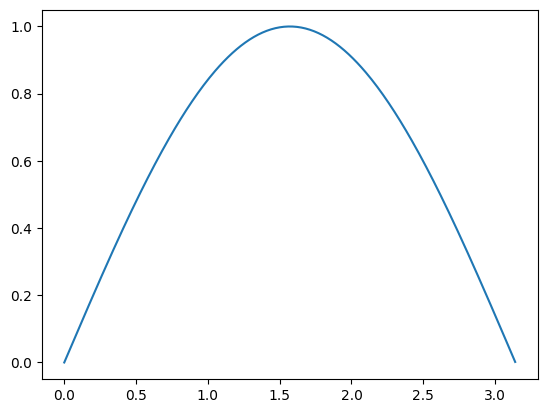

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.arange(0, np.pi, 0.01)
y=np.sin(x)
plt.plot(x,y)
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt
x = np.arange(0, np.pi, 0.01)
y=np.sin(x)
plt.plot(x,y)
plt.show()

ImportError: ignored

Magic ```%%time```

In [34]:
%%time
import random
N=10**6
for i in range(N):
    random.random()

CPU times: user 110 ms, sys: 507 µs, total: 111 ms
Wall time: 111 ms


In [36]:
%timeit random.random()

154 ns ± 6.92 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [37]:
who

Car	 Exm	 N	 a	 b	 c	 datetime	 i	 np	 
plt	 random	 today	 x	 y	 


In [45]:
%who int

N	 a	 b	 i	 


In [46]:
myStr = "hello"
%who str

myStr	 


In [47]:
lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late